<a href="https://colab.research.google.com/github/pmantramurti/CMPE257-Fall23-Pranay-Mantramurti/blob/homework/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1

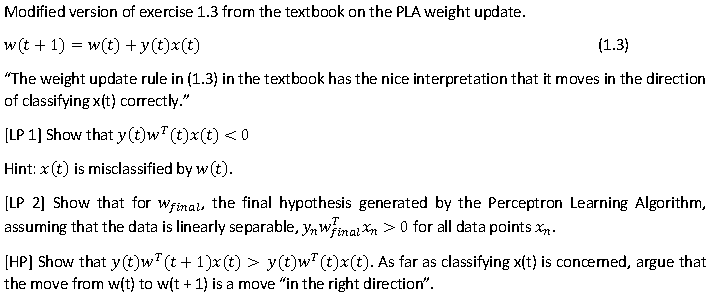

##LP 1

Given that x(t) is misclassified by w(t), and that this is a binary classification, then we can assume that $w^{T}(t)$x(t) would result in a value of the opposite sign of y(t), thus their product will always be negative. As such, for all y(t)$w^{T}(t)$x(t) where w(t) misclassifies x(t),  y(t)$w^{T}(t)$x(t) is less than 0.

##LP 2

Given that the data is linearly separable, such that $w_{final}(t)$ correctly classifies x(t), then $w^{T}_{final}(t)$ times x(t) would always result in a value of the same sign as y(t), thus their product will always be positive. As such, for all y(t)$w^{T}_{final}(t)$x(t), where x(t) is correctly classified by $w^{T}_{final}(t)$, y(t)$w^{T}_{final}(t)$x(t) is greater than 0.

##HP

Given that we moved from w(t) to w(t+1), we can assume that w(t) misclassified x(t). Since w(t+1)=w(t) + y(t)x(t), then w(t+1), when tested on the previously misclassified x(t), will correctly classify x(t).

With this is mind, using the answers to the previous LP's, we know that a correct classification will always be greater than 0, and a misclassification will always be less than 0.

In other words, when w(t) misclassifies x(t), y(t)$w^{T}(t)$x(t) < 0, and when w(t+1) correctly classifies x(t), y(t)$w^{T}(t+1)$x(t)>0. Thus, we can combine the two to get:

y(t)$w^{T}(t+1)$x(t) > y(t)$w^{T}(t)$x(t)

#Task 2

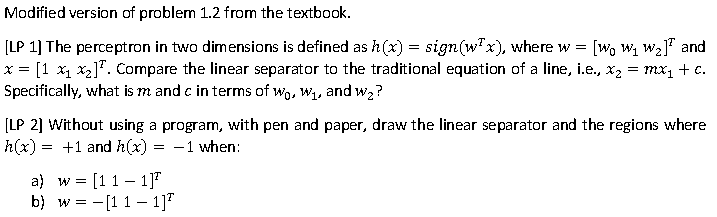

##LP 1

Given $w^{T}$x, then we can write the equation as:

$w_{1}$$x_{1}$ + $w_{2}$$x_{2}$ + $w_{0}$ = 0

-$w_{2}$$x_{2}$ = $w_{1}$$x_{1}$ + $w_{0}$

$x_{2}$ = ($w_{1}$$x_{1}$ + $w_{0}$)/-$w_{2}$

$x_{2}$ = -($w_{1}$/$w_{2}$)$x_{1}$ + -$w_{0}$/$w_{2}$

Since $x_{2}$ = m$x_{1}$ + c

Then m = -$w_{1}$/$w_{2}$ and c = -$w_{0}$/$w_{2}$

##LP 2

###a) w = $[1 1 -1]^{T}$

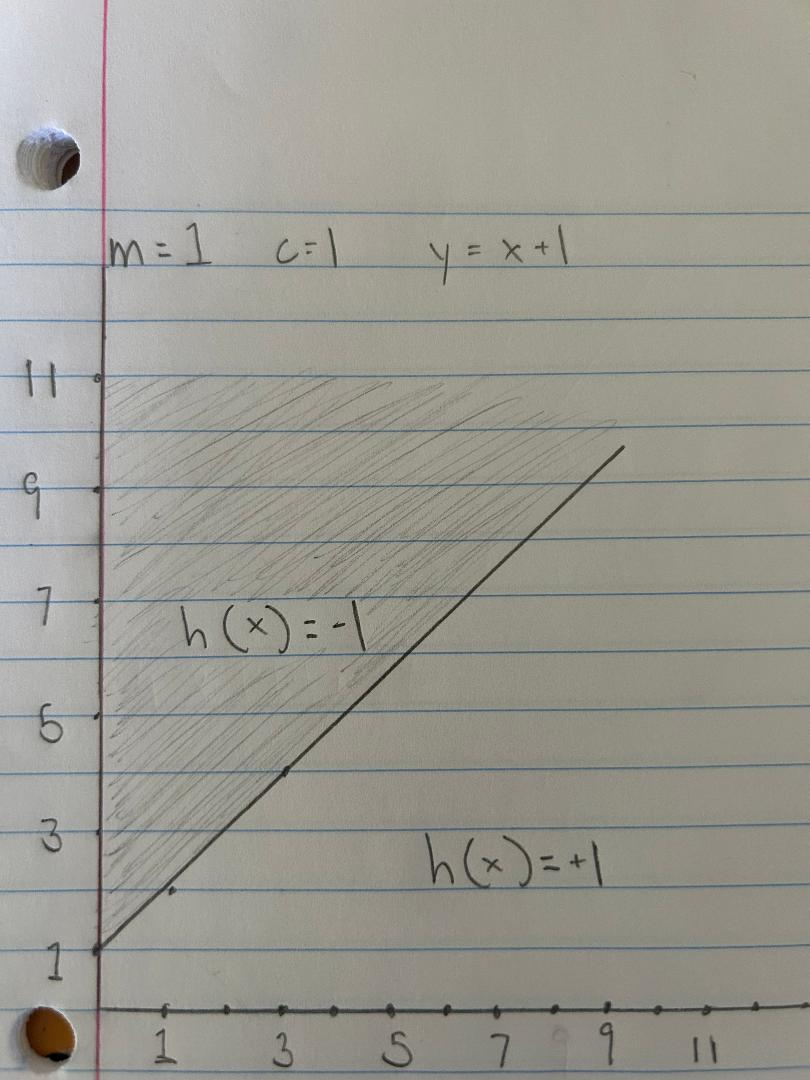

###b) w = $-[1 1 -1]^{T}$

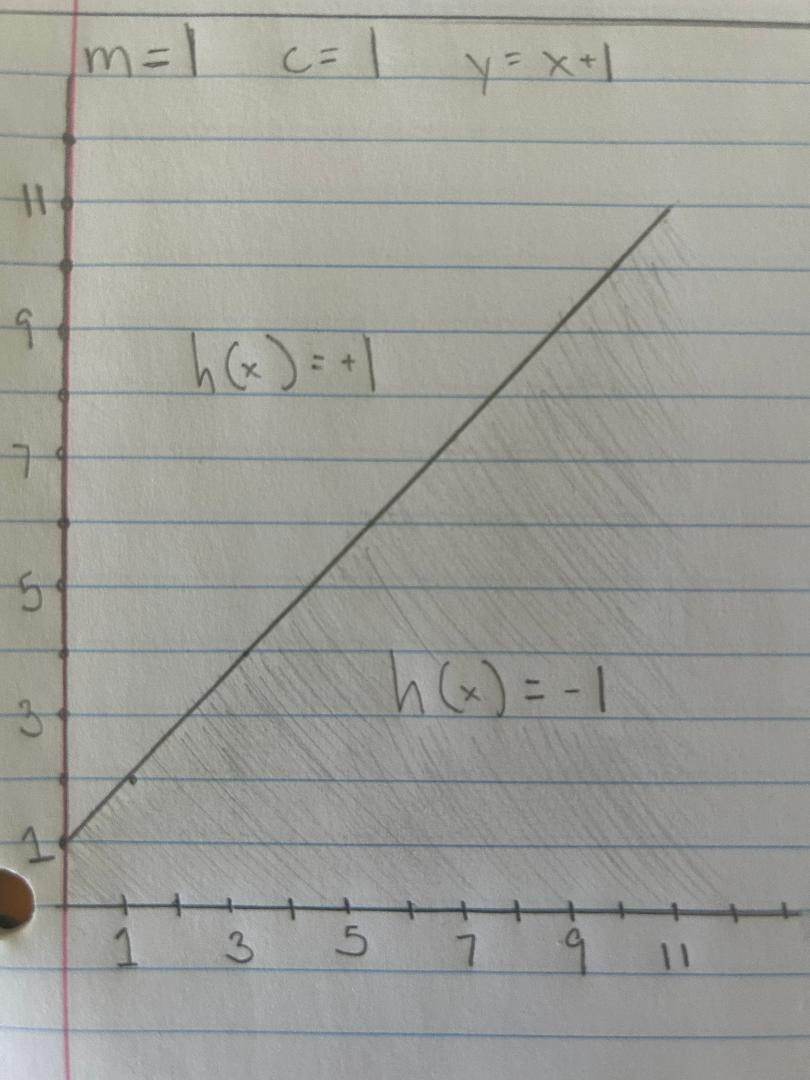

#Task 3

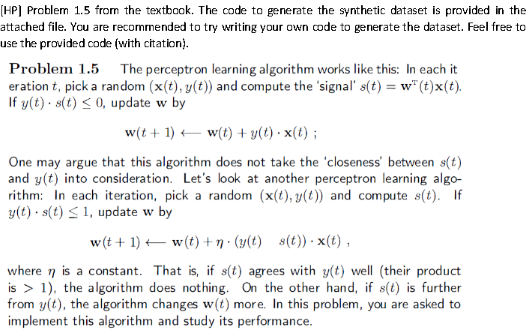

##Generate Dataset

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Generates N random points for a given linear separator w
## if wTx > 0, y = 1; if wTx < 0, y = -1. wTx = 0 are discarded
def generate_pla(N=20,w0=0,w1=1,w2=1):
    n = 0
    X1 = []
    X2 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-10,10)
        y_step = w0 + w1*x1 + w2*x2
        if(y_step == 0):
            continue
        X1.append(x1)
        X2.append(x2)
        if(y_step > 0):
            Y.append(1)
        elif(y_step < 0):
            Y.append(-1)
        n += 1
    data = [np.array([1,X1[i],X2[i],Y[i]]) for i in range(N)]
    return data

In [2]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept) )

##Adjusted Algorithm + associated Functions

In [3]:
def getSign(x):
  if x < 0:
    return -1
  if x >= 0:
    return 1

def getDot(w, i, df):
  ans = w[0] + w[1]*df.x1[i] + w[2]*df.x2[i]
  return ans

def adjustWeights(w, i, df, n, s):
  yAdj = n*(df.y[i] - s)
  w2 = [w[0] + yAdj, w[1] + df.x1[i]*yAdj, w[2] + df.x2[i]*yAdj]
  return w2

In [4]:
def adjPLA(df, n):
  w = [1,0,0]
  accurate = False
  updates = 0
  while not accurate and updates < 1000 :
    updates += 1
    accurate = True
    i = random.randrange(0, df.shape[0])
    s = getDot(w, i, df)
    if s*df.y[i] <= 0:
      w = adjustWeights(w, i, df, n, s)
    for i in range(0, df.shape[0]):
      s = getDot(w, i, df)
      if s*df.y[i] <= 0:
        accurate = False
        break
  return w

##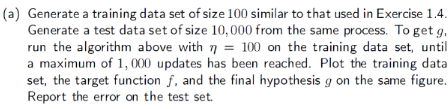

In [5]:
f_w0, f_w1, f_w2 = 5, 7, 8
N = 100
train_data = generate_pla(N, f_w0, f_w1, f_w2)

N = 10000
test_data = generate_pla(N, f_w0, f_w1, f_w2)

df_train = pd.DataFrame(train_data)
df_train.drop([0], axis = 1, inplace=True)
df_train.columns = ['x1', 'x2', 'y']

df_test = pd.DataFrame(test_data)
df_test.drop([0], axis = 1, inplace=True)
df_test.columns = ['x1', 'x2', 'y']

In [6]:
n=100
w = adjPLA(df_train, n)

len = df_test.shape[0]
corr = 0
for i in range(0, df_test.shape[0]):
  if getSign(getDot(w, i, df_test)) == df_test.y[i]:
    corr+= 1

<ipython-input-3-137cc9f488e7>:12: RuntimeWarning: overflow encountered in double_scalars
  yAdj = n*(df.y[i] - s)
<ipython-input-3-137cc9f488e7>:8: RuntimeWarning: invalid value encountered in double_scalars
  ans = w[0] + w[1]*df.x1[i] + w[2]*df.x2[i]
<ipython-input-3-137cc9f488e7>:13: RuntimeWarning: invalid value encountered in double_scalars
  w2 = [w[0] + yAdj, w[1] + df.x1[i]*yAdj, w[2] + df.x2[i]*yAdj]


Error :  1.0
[nan, nan, nan]


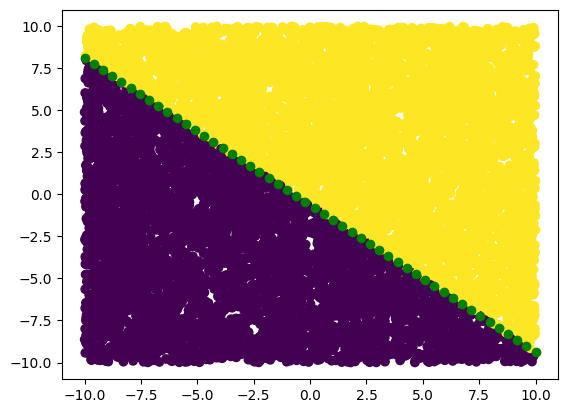

In [7]:
print('Error : ', (1 - corr/len))
fig, ax = plt.subplots()
ax.scatter(df_test.x1, df_test.x2, c=df_test.y)
x=np.linspace(start=-10, stop=10)
print(w)
ax.plot(x, -(w[1]*x+w[0])/w[2], 'r+')
ax.plot(x, -(f_w1*x+f_w0)/f_w2, 'go')

The red line represents the final hypothesis g and the green line is the target function f. In this case, as the weight values exceeded the limits of the variables, g cannot be plotted.

##image.png

In [8]:
n=1
w = adjPLA(df_train, n)

len = df_test.shape[0]
corr = 0
for i in range(0, df_test.shape[0]):
  if getSign(getDot(w, i, df_test)) == df_test.y[i]:
    corr+= 1

<ipython-input-3-137cc9f488e7>:8: RuntimeWarning: overflow encountered in double_scalars
  ans = w[0] + w[1]*df.x1[i] + w[2]*df.x2[i]
<ipython-input-3-137cc9f488e7>:8: RuntimeWarning: invalid value encountered in double_scalars
  ans = w[0] + w[1]*df.x1[i] + w[2]*df.x2[i]
<ipython-input-3-137cc9f488e7>:13: RuntimeWarning: invalid value encountered in double_scalars
  w2 = [w[0] + yAdj, w[1] + df.x1[i]*yAdj, w[2] + df.x2[i]*yAdj]


Error :  1.0
[nan, nan, nan]


(-10.0, 10.0)

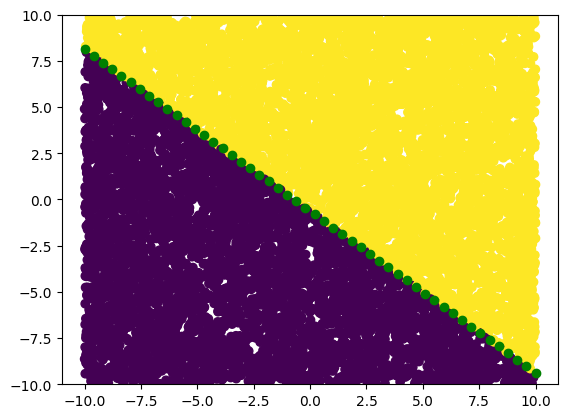

In [9]:
print('Error : ', (1 - corr/len))
fig, ax = plt.subplots()
ax.scatter(df_test.x1, df_test.x2, c=df_test.y)
x=np.linspace(start=-10, stop=10)
print(w)
ax.plot(x, -(w[1]*x+w[0])/w[2], 'r+')
ax.plot(x, -(f_w1*x+f_w0)/f_w2, 'go')
plt.ylim(-10, 10)

The red line represents the final hypothesis g and the green line is the target function f.

##image.png

In [10]:
n=0.01
w = adjPLA(df_train, n)

len = df_test.shape[0]
corr = 0
for i in range(0, df_test.shape[0]):
  if getSign(getDot(w, i, df_test)) == df_test.y[i]:
    corr+= 1

Error :  0.022700000000000053
[0.684813192495967, 0.5374982073333953, 0.6408528419824737]


(-10.0, 10.0)

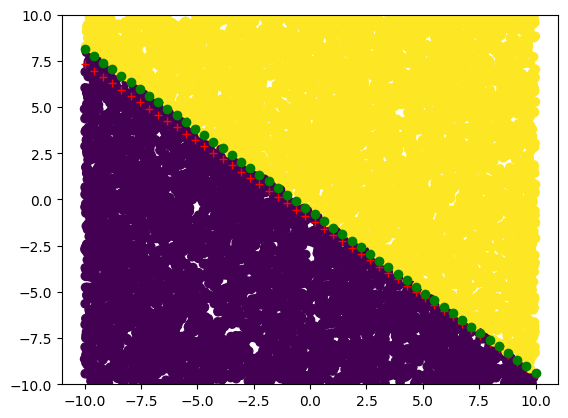

In [11]:
print('Error : ', (1 - corr/len))
fig, ax = plt.subplots()
ax.scatter(df_test.x1, df_test.x2, c=df_test.y)
x=np.linspace(start=-10, stop=10)
print(w)
ax.plot(x, -(w[1]*x+w[0])/w[2], 'r+')
ax.plot(x, -(f_w1*x+f_w0)/f_w2, 'go')
plt.ylim(-10, 10)

##image.png

In [12]:
n=0.0001
w = adjPLA(df_train, n)

len = df_test.shape[0]
corr = 0
for i in range(0, df_test.shape[0]):
  if getSign(getDot(w, i, df_test)) == df_test.y[i]:
    corr+= 1

Error :  0.25
[0.9498081161026485, 0.14819092844973597, 0.13266076543523134]


(-10.0, 10.0)

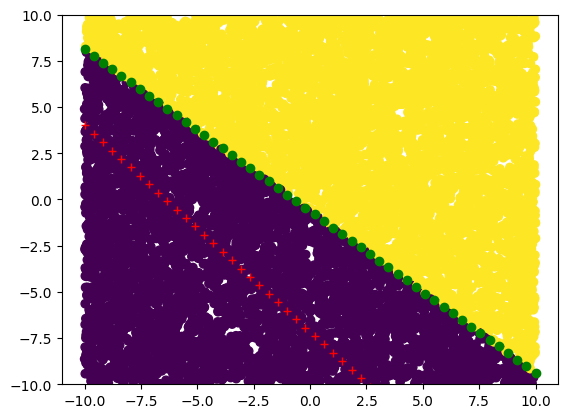

In [13]:
print('Error : ', (1 - corr/len))
fig, ax = plt.subplots()
ax.scatter(df_test.x1, df_test.x2, c=df_test.y)
x=np.linspace(start=-10, stop=10)
print(w)
ax.plot(x, -(w[1]*x+w[0])/w[2], 'r+')
ax.plot(x, -(f_w1*x+f_w0)/f_w2, 'go')
plt.ylim(-10, 10)

##image.png

Results:

(a) Error = 100% - Weight values hit overflow limit and such no result achieved

(b) Error = 100% - Weight values hit overflow limit and such no result achieved

(c) Error = 2.27%

(d) Error = 25%

For a, n = 100 and b, n = 1, the model failed to converge on a value, and thus extended off into infinity. On the other hand d, n = 0.0001, was able to converge, however, it converged poorly and had a significant rate of error, with a quarter of the entries being misclassified. Finally, c, n = 0.01, was the most successful, having a near perfect error of only 2.27%.

Based on this, it can be concluded that the optimal value for n is at or near 0.01.

##Citations

Data generation code created by Professor Suresh, provided for the purposes of this assignment.

#Task 4 [Incomplete]

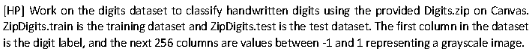
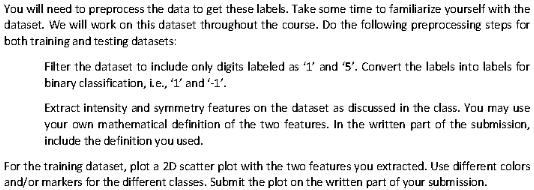

##Preprocessing

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ZipDigits/ZipDigits.train', header=None, delimiter=' ')
df_test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ZipDigits/ZipDigits.test', header=None, delimiter=' ')

In [113]:
include = [1, 5]
df_train = df_train[df_train[0].isin(include)]
df_test = df_test[df_test[0].isin(include)]

Here we replace 5 with -1 in order to make the model binary

In [115]:
df_train[0] = df_train[0].replace(5, -1)
df_test[0] = df_test[0].replace(5, -1)

##Model Functions

In [128]:
def ZDGetDot(w, i, df):
  ans = df.iloc[i].dot(w)
  return ans

def ZDAdjustWeights(w, i, df):
  w2 = w + df.iloc[i]*df.iloc[i][0]
  #[w[0] + df.y[i], w[1] + df.x1[i]*df.y[i], w[2] + df.x2[i]*df.y[i]]
  return w2

def ZDPLA(df):
  w = [0]*(df.shape[1])
  accurate = False
  updates = 0
  minErrors = df.shape[0]
  errors = 0
  wBest = [0]*(df.shape[1])
  while not accurate and updates < 100 :
    updates += 1
    accurate = True
    i = random.randrange(0, df.shape[0])
    if getSign(ZDGetDot(w, i, df)) != df.iloc[i][0]:
      w = ZDAdjustWeights(w, i, df)
    for i in range(0, df.shape[0]):
      if getSign(ZDGetDot(w, i, df)) != df.iloc[i][0]:
        accurate = False
        errors += 1
    if errors < minErrors:
      wBest = w.copy()
      minErrors = errors
  return wBest

In [134]:
def checkModel(w, df):
  correct = 0
  for i in range(0, df.shape[0]):
    if getSign(ZDGetDot(w, i, df)) == df.iloc[i][0]:
      correct+=1
  return correct/df.shape[0]

In [129]:
w = ZDPLA(df_train)

In [135]:
Accuracy = checkModel(w, df_test)

In [136]:
print('Accuracy : ', Accuracy)

Accuracy :  0.0
